# Aula 09 &mdash; Introdução a visualização de dados

Renato Vimieiro
rv2 {em} cin.ufpe.br

abril 2017

## Por quê visualizar dados?

- Visão fornece um mecanismo de comunicação em *banda larga* com o cérebro
- Explorar a capacidade humana de detectar padrões visuais
- Parte da informação visual é pré-processada de inconscientemente pelo cérebro

## Exemplo processamento pré-atentivo

<div style="text-align:center;margin-left:30px;letter-spacing: 10px;">
<br>
<font color='grey' size=18 opacity=0.5>
67830958779870871254 <br><br>
14098349857690874124 <br><br>
30958745780975302156 <br><br>
12345095768179826847 <br><br>
</font>
<div>

## Exemplo processamento pré-atentivo

<div style="text-align:center;margin-left:30px;letter-spacing: 10px;">
<br>
<font color='grey' size=18 opacity=0.5>
678<font color='red' size=18 style="opacity=0.5">3</font>0958779870871254 <br><br>
14098<font color='red' size=18 style="opacity=0.5">3</font>49857690874124 <br><br>
<font color='red' size=18 style="opacity=0.5">3</font>0958745780975<font color='red' size=18 style="opacity=0.5">3</font>02156 <br><br>
12<font color='red' size=18 style="opacity=0.5">3</font>45095768179826847 <br><br>
</font>
<div>

## Para quê visualizar dados?

- Visualização **exploratória**
    - Usar elementos visuais para se familiarizar com os dados antes de iniciar a análise
- Visualização **explanatória**
    - Usar elementos visuais para contar uma estória, explicar os resultados da análise

## Visualização exploratória

- O uso de elementos gráficos auxilia na análise exploratória de dados
- As estatísticas descritivas que vimos na aula anterior podem falhar
- Exemplo clássico dos conjuntos de dados de Anscombe (quarteto de Anscombe)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()
% matplotlib inline

Loading BokehJS ...

In [2]:
df1 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]})
df2 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]})
df3 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]})
df4 = pd.DataFrame({'x':[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
                   'y':[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})

df = pd.concat([df1,df2,df3,df4], axis=1, 
               keys=list(map(lambda x: 'df{}'.format(x), range(1,5))))

In [3]:
df

df1          df2         df3          df4       
       x      y     x     y     x      y     x      y
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [4]:
f = lambda x: pd.Series({'media':np.round(x.mean(),1),'desv_pad':np.round(x.std(),1)})
pd.concat([df1.apply(f),df2.apply(f),df3.apply(f),df4.apply(f)],axis=1,
          keys=list(map(lambda x: 'df{}'.format(x), range(1,5))))

df1       df2       df3       df4     
            x    y    x    y    x    y    x    y
desv_pad  3.3  2.0  3.3  2.0  3.3  2.0  3.3  2.0
media     9.0  7.5  9.0  7.5  9.0  7.5  9.0  7.5

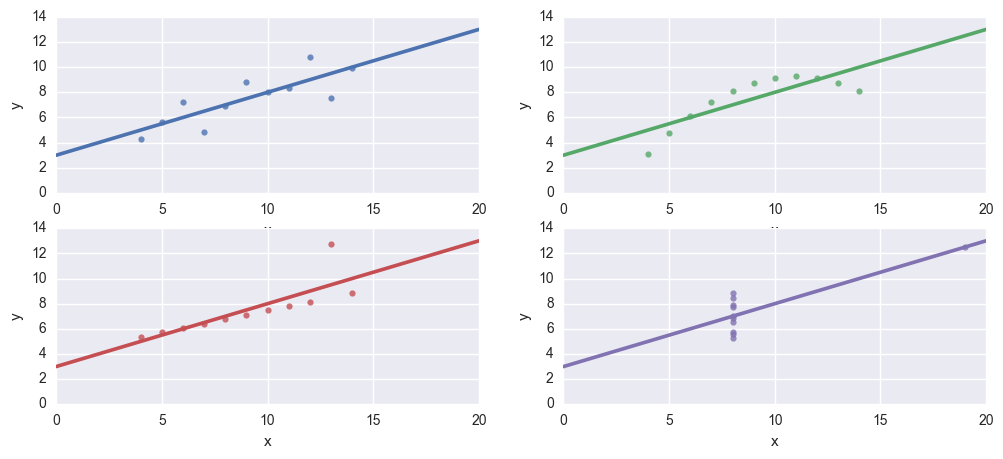

In [5]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,5))
axes[0][0].set_xlim([0,20]);axes[0][0].set_ylim([0,14]);axes[0][1].set_xlim([0,20]),axes[0][1].set_ylim([0,14]);axes[1][0].set_xlim([0,20]);axes[1][0].set_ylim([0,14]);axes[1][1].set_xlim([0,20]);axes[1][1].set_ylim([0,14])
sns.regplot(x='x',y='y',data=df1,ci=None,ax=axes[0][0])
sns.regplot(x='x',y='y',data=df2,ci=None,ax=axes[0][1])
sns.regplot(x='x',y='y',data=df3,ci=None,ax=axes[1][0])
sns.regplot(x='x',y='y',data=df4,ci=None,ax=axes[1][1]);


## Tipos de visualizações

- Podemos construir em Python visualizações estáticas e interativas
- Visualizações estáticas são úteis para documentos impressos
    - São gráficos tradicionais, os quais podem, inclusive, ser produzidos à mão


## Tipos de visualizações

- Visualizações dinâmicas permitem explorar vários aspectos dos dados
    - O usuário pode interagir com o gráfico/visualização para explorar partes específicas dos dados
- Python possui diversas bibliotecas para visualizações estáticas e interativas
    - Matplotlib, Seaborn, ggplot, Bokeh, Plot.ly

## Gráficos estáticos

- Gráficos estáticos servem para visualizar estatísticas básicas
- Os tipos mais comuns são:
    - dados categóricos:
        - barras
        - ~~pizza~~
    - dados numéricos:
        - histogramas
        - densidade
        - boxplot
        - dispersão

## Dados

- Para ilustrar os diversos tipos de gráficos, usaremos os conjuntos de dados de expectativa de vida e PIB da aula anterior

In [6]:
expvida = pd.read_csv("../2017.1/data/banco_mudial/life_expectancy.csv",index_col=0,
                      skiprows=[0,1,2],)
expvida = expvida.drop(['Indicator Name', 'Indicator Code', 
                        'Country Code'],axis=1).dropna(axis=1,how='all')
gdp = pd.read_csv("../2017.1/data/banco_mudial/gdp.csv",index_col=0,
                      skiprows=[0,1,2],)
gdp = gdp.drop(['Indicator Name', 'Indicator Code', 
                'Country Code', '2015'],axis=1).dropna(axis=1,how='all')

## Gráficos e Pandas

- Pandas possui integração direta com Matplotlib
- É possível também utilizar facilmente outras bibliotecas como Seaborn e Bokeh
- Vamos usar essas três bibliotecas como exemplo, mas recomendo o estudo de ggplot

#### Gráfico de barras

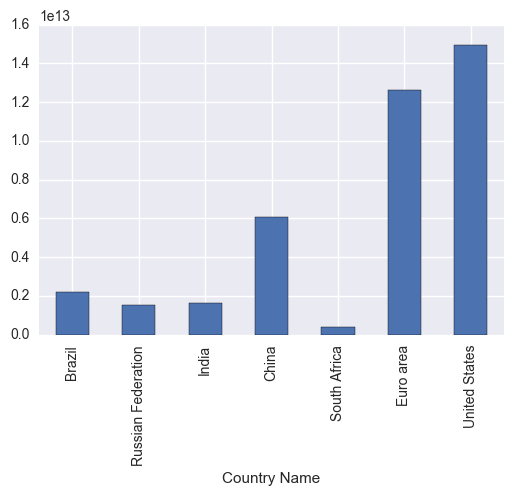

In [7]:
BRICS = ["Brazil", "Russian Federation","India", 'China', 'South Africa', 'Euro area', 'United States']
gdp.loc[BRICS,'2010'].plot.bar()

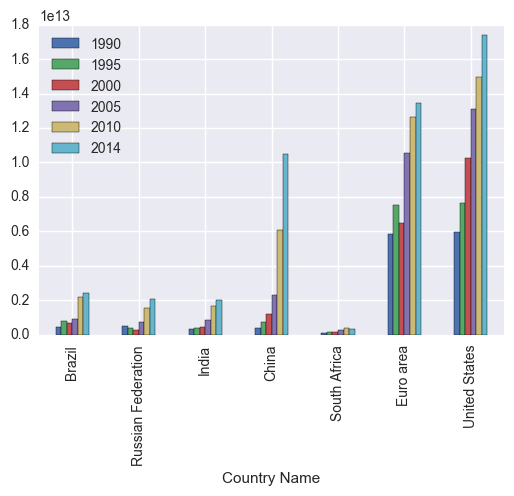

In [8]:
gdp.loc[BRICS,['1990','1995','2000','2005','2010','2014']].plot.bar();

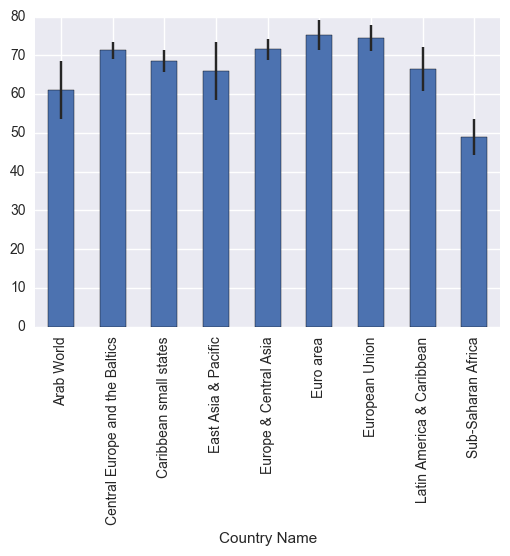

In [9]:
regions = ['Arab World','Central Europe and the Baltics',
            'Caribbean small states', 'East Asia & Pacific',
       'Europe & Central Asia','Euro area',
            'European Union','Latin America & Caribbean','Sub-Saharan Africa'
            ]
expvida.loc[regions].mean(axis=1).plot.bar(yerr=expvida.loc[regions].std(axis=1))

#### Histograma

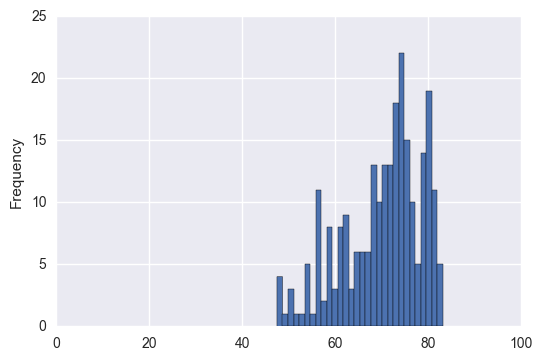

In [10]:
fig, ax = plt.subplots()
ax.set_xlim([0,100])
expvida['2010'].plot.hist(bins=30);

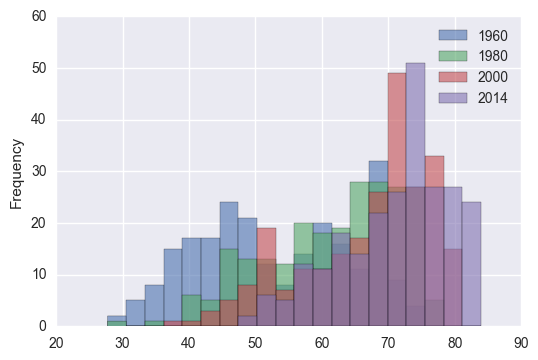

In [11]:
expvida[['1960','1980','2000','2014']].plot.hist(stacked=False,
                                                 bins=20, alpha=.6);

#### Densidade

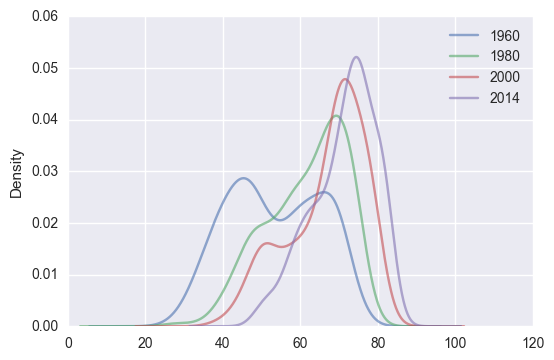

In [12]:
expvida[['1960','1980','2000','2014']].plot.density(alpha=.6);

/usr/local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


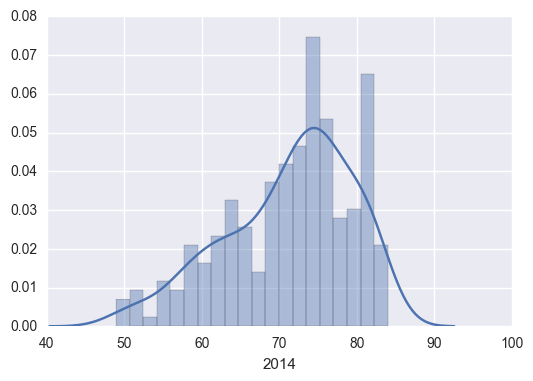

In [13]:
sns.distplot(expvida['2014'].dropna(),hist=True,bins=20);

#### Box plot

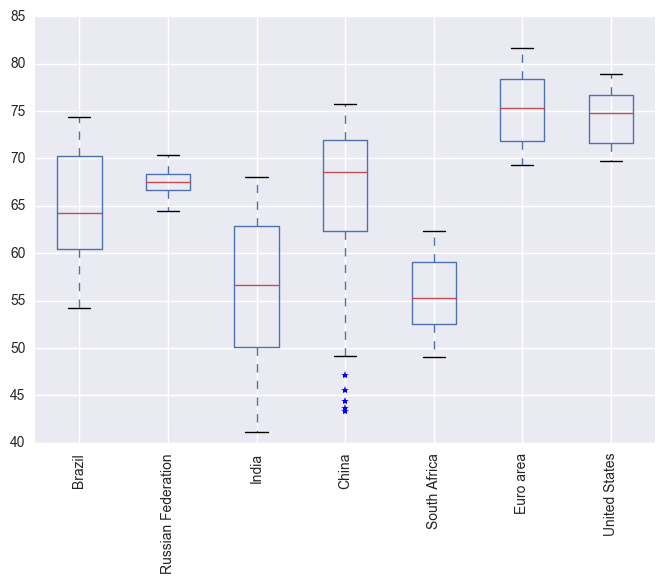

In [34]:
expvida.loc[BRICS].T.plot.box(rot=90,sym='*');

Lendo o boxplot
===========

- O boxplot mostra graficamente o resumo dos cinco números dos dados
- O topo da caixa é o Q3 (terceiro quartil)
- O fundo é o Q1
- O risco dentro da caixa é a mediana (Q2)
- Os whiskers são: (**inferior**) o maior valor entre o mínimo e Q1 - 1.5 x IQR; (**superior**) o menor valor entre o máximo e Q3 + 1.5 x IQR

Exemplo
----------------

- Vamos fabricar um exemplo para explorar o boxplot
- Usaremos um vetor com 12 pontos como a seguir

In [29]:
v = np.concatenate((np.repeat(5,3), np.repeat(10,2),
                          np.repeat(15,2),np.array([33,32,1,-13.5,-15])),
                         axis=0)
v.sort()
print(np.vstack((v,np.arange(1,v.shape[0]+1))))

[[-15.  -13.5   1.    5.    5.    5.   10.   10.   15.   15.   32.   33. ]
 [  1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12. ]]


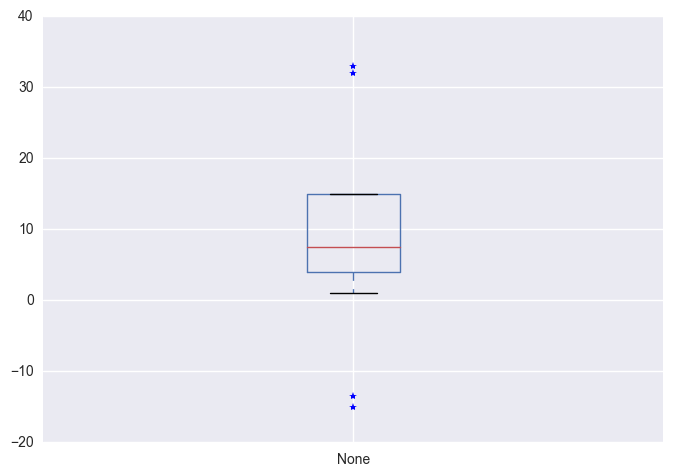

In [30]:
pd.Series(v).plot.box(sym='*');

In [17]:
pd.Series(v).quantile([.25,.5,.75])

0.25     4.0
0.50     7.5
0.75    15.0
dtype: float64

#### Gráficos de dispersão

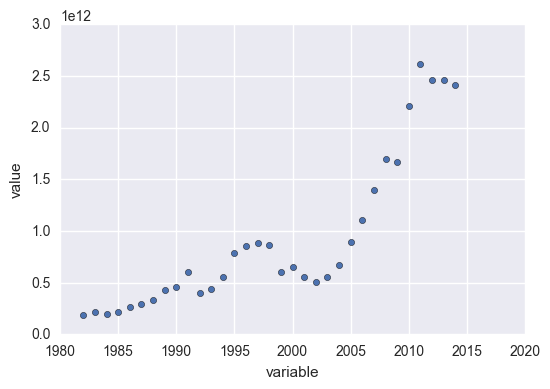

In [18]:
df = pd.melt(gdp.reset_index(),id_vars='Country Name'); df.set_index(['Country Name'], inplace=True); 
df.variable = df.variable.astype(int)
df.loc['Brazil'].plot.scatter(x='variable',y='value')

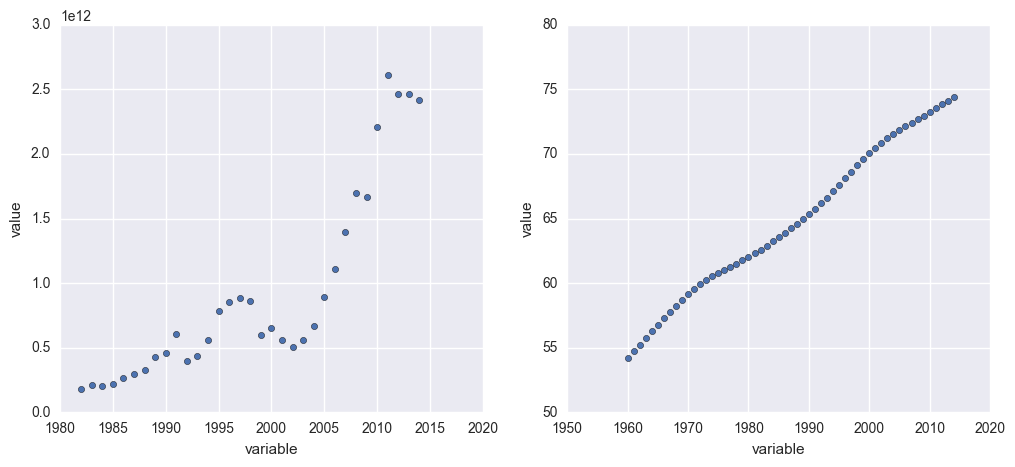

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
df.loc['Brazil'].plot.scatter(x='variable',y='value',ax=ax[0])
df = pd.melt(expvida.reset_index(),id_vars='Country Name')
df.set_index(['Country Name'], inplace=True)
df.variable = df.variable.astype(int)
df.loc['Brazil'].plot.scatter(x='variable',y='value',ax=ax[1]);

#### Gráfico de linha

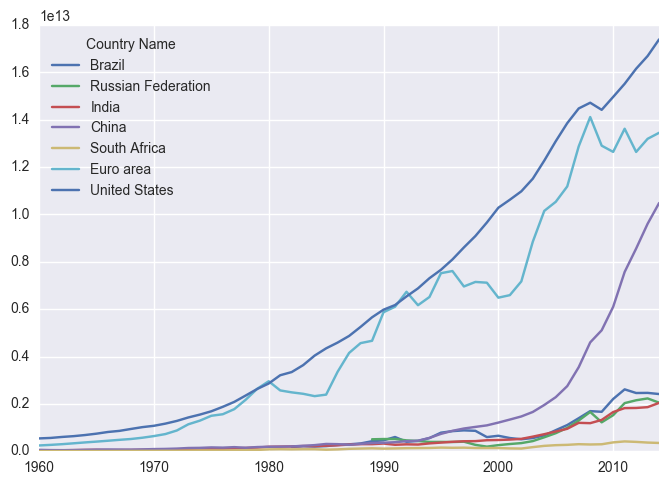

In [36]:
gdp.loc[BRICS].T.plot.line();

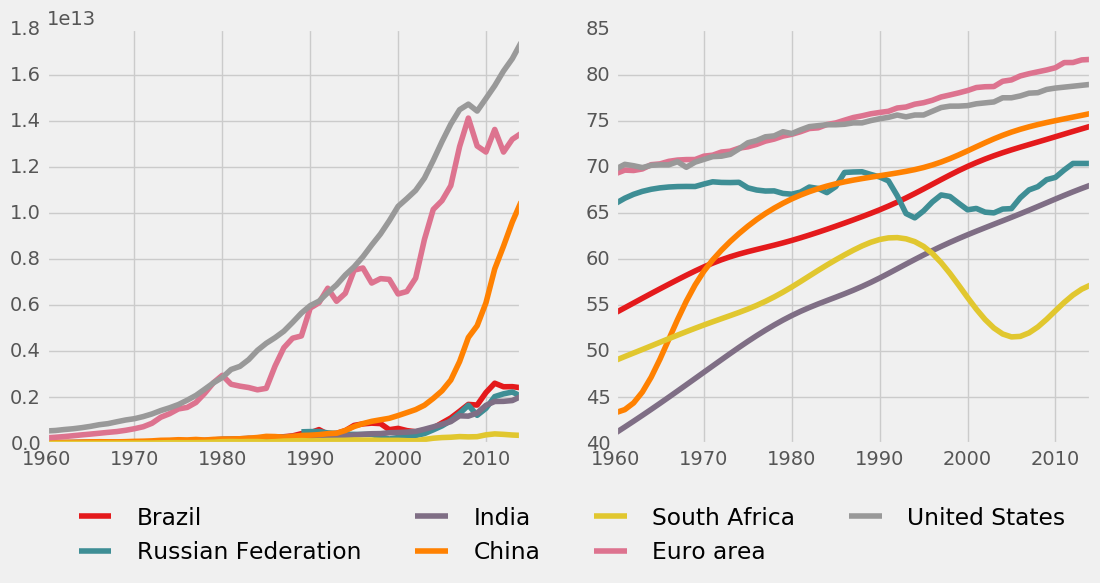

In [44]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
gdp.loc[BRICS].T.plot.line(ax=ax[0],legend=False,colormap='Set1')
expvida.loc[BRICS].T.plot.line(ax=ax[1],legend=False,colormap='Set1')
handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels,loc=9, bbox_to_anchor=(-0.1, -0.1), ncol=4);

In [22]:
matplotlib.style.available

['seaborn-muted',
 'seaborn-poster',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-bright',
 'bmh',
 'seaborn-notebook',
 'seaborn-paper',
 'classic',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-white',
 'grayscale',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-talk',
 'dark_background',
 'fivethirtyeight',
 'seaborn-ticks',
 'seaborn-pastel']

In [43]:
matplotlib.style.use('fivethirtyeight')